# FAKE NEWS DETECTION

In [41]:
import pandas as pd
import numpy as np
import itertools

In [44]:
df = pd.read_csv("news.csv")

In [49]:
df.head(20)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [8]:
df.shape

(6335, 4)

In [9]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [12]:
labels = df.label

In [13]:
labels

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [14]:
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(df['text'],labels, test_size=0.2 , random_state = 20)

In [17]:
x_train.head()

4741    NAIROBI, Kenya — President Obama spoke out Sun...
2089    Killing Obama administration rules, dismantlin...
4074    Dean Obeidallah, a former attorney, is the hos...
5376      WashingtonsBlog \nCNN’s Jake Tapper hit the ...
6028    Some of the biggest issues facing America this...
Name: text, dtype: object

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

In [19]:
#initialise a TdidfVectorizer
vector = TfidfVectorizer(stop_words="english",max_df=0.7)

In [21]:
#fit and transform
tf_train = vector.fit_transform(x_train)
tf_test = vector.transform(x_test)

In [22]:
#initialise a Passive Aggresssive Classifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [25]:
#prediction the test dataset
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = pac.predict(tf_test)

In [26]:
score = accuracy_score(y_test,y_pred)

In [34]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [30]:
print(f"Accuracy : {round(score*100,2)}%")

Accuracy : 94.71%


Confusion matrix, without normalization


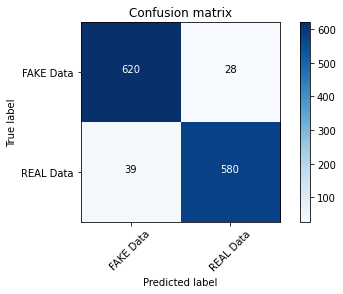

In [37]:
#confusion matrix
confusion_matrix(y_test,y_pred)


#printing the confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [46]:
#saving model
import pickle
filename = "finalized_model.pkl"
pickle.dump(pac,open(filename,'wb'))

In [48]:
#save vectorizer
filename = "vectorizer.pkl"
pickle.dump(vector,open(filename,'wb'))